In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [113]:
filepath = 'medical_examination.csv'
df = pd.read_csv(filepath)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
cardio1 = df[df['cardio'] == 1]
cardio0 = df[df['cardio'] == 0]
cholesterol_one = df[(df['cholesterol'] >= 1) & (df['cardio'] == 0)].shape[0]
cholesterol_one

35021

In [13]:
cholesterol_zero = df[df['cholesterol'] == 0].shape[0]
cholesterol_zero

0

In [21]:
gluc1_one = cardio1[cardio1['gluc'] >= 1].shape[0]
gluc1_zero = cardio1.shape[0]-gluc1_one
gluc0_one = cardio0[cardio0['gluc'] >= 1].shape[0]
gluc0_zero = cardio0.shape[0]-gluc0_one

In [22]:
s1_one = cardio1[cardio1['smoke'] >= 1].shape[0]
s1_zero = cardio1.shape[0]-s1_one
s0_one = cardio0[cardio0['smoke'] >= 1].shape[0]
s0_zero = cardio0.shape[0]-s0_one

In [23]:
al1_one = cardio1[cardio1['alco'] >= 1].shape[0]
al1_zero = cardio1.shape[0]-al1_one
al0_one = cardio0[cardio0['alco'] >= 1].shape[0]
al0_zero = cardio0.shape[0]-al0_one

In [24]:
ac1_one = cardio1[cardio1['active'] >= 1].shape[0]
ac1_zero = cardio1.shape[0]-ac1_one
ac0_one = cardio0[cardio0['active'] >= 1].shape[0]
ac0_zero = cardio0.shape[0]-ac0_one

In [25]:
c0a0 = np.array([0, gluc0_zero,s0_zero,al0_zero,ac0_zero])
c0a0

array([    0,     0, 31781, 33080,  6378])

In [26]:
c0a1 = np.array([35021, gluc0_one, s0_one, al0_one, ac0_one])
c0a1

array([35021, 35021,  3240,  1941, 28643])

In [27]:
c1a0 = np.array([0, gluc1_zero, s1_zero, al1_zero, ac1_zero])
c1a0

array([    0,     0, 32050, 33156,  7361])

In [28]:
c1a1 = np.array([34979, gluc1_one, s1_one, al1_one, ac1_one])
c1a1

array([34979, 34979,  2929,  1823, 27618])

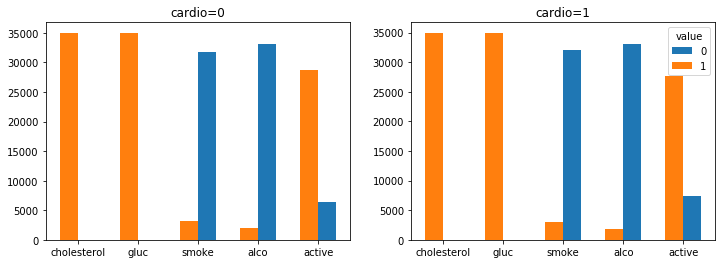

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
a = np.arange(5)
plt.bar(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], c0a0, width=0.3, align="edge", )
plt.bar(a-0.3, c0a1, width=0.3, bottom=0, align="edge")
plt.title("cardio=0")
plt.subplot(1,2,2)
plt.bar(['cholesterol', 'gluc', 'smoke', 'alco', 'active'], c1a0, width=0.3, align="edge")
plt.bar(a-0.3, c1a1, width=0.3, bottom=0, align="edge")
plt.title("cardio=1")
plt.legend([0,1], title="value")

In [80]:
BMI = 10000*df['weight']/(df['height']*df['height'])
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [81]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [83]:
for i,j in BMI.items():
    if j > 25:
        BMI[i] = 1
    else:
        BMI[i] = 0
BMI = BMI.astype(int)


In [84]:
BMI

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Length: 70000, dtype: int64

In [119]:
df['overweight'] = BMI
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0


In [120]:
df['cholesterol'] = (df['cholesterol'] > 1)

In [121]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,False,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,False,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,False,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,False,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,False,0,0,0,0,0,0


In [122]:
df['cholesterol']

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: cholesterol, Length: 70000, dtype: bool

In [123]:
df['cholesterol'] = df['cholesterol'].astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [124]:
df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=[
            'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'
        ])

In [125]:
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0
